In [ ]:
import pandas as pd
import sys
sys.path.append('../src')
from database import get_last_data, get_collection
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns
from itertools import combinations
from wordcloud import WordCloud
from collections import Counter
import re


In [3]:
SCRAPPER = os.getenv("COLLECTION_SCRAPPER")

In [4]:
df = pd.DataFrame(get_last_data(collection=SCRAPPER))
df.head()

,_id,title,link,summary,tags,author,date
0,689330e051c633bae5dfc810,Unity What is Total Size and How can reduce it?,https://stackoverflow.com/questions/79726304/u...,I'm developing a 2D game in Unity (version 6.1...,[unity-game-engine],zafer,2025-08-05 14:55:08Z
1,689330e051c633bae5dfc811,How to reclaim horizontal space made available...,https://stackoverflow.com/questions/79726327/h...,I have a row of subplots which start with a hi...,"[python, matplotlib, whitespace, subplot]",sds,2025-08-05 15:22:19Z
2,689330e051c633bae5dfc812,Why presenting ActivityView created from UIVie...,https://stackoverflow.com/questions/79726331/w...,I am using the following library to create scr...,"[swiftui, screenshot, uiviewrepresentable]",Bartłomiej Semańczyk,2025-08-05 15:27:01Z
3,689330e051c633bae5dfc813,Compile-time manipulation of std::source_locat...,https://stackoverflow.com/questions/79726322/c...,I want to write a function that can obtain cal...,"[c++, constexpr, consteval, std-source-location]",GKxx,2025-08-05 15:13:16Z
4,689330e051c633bae5dfc814,Expo TaskManager not executing on scheduled no...,https://stackoverflow.com/questions/79726321/e...,I'm building a sunrise alarm clock app in Reac...,"[, android, react-native, expo, notifications,...",user27776453,2025-08-05 15:11:38Z


In [5]:
df.shape


(478, 7)

Text(0.5, 1.0, "Nuage de mots des 'tags'")

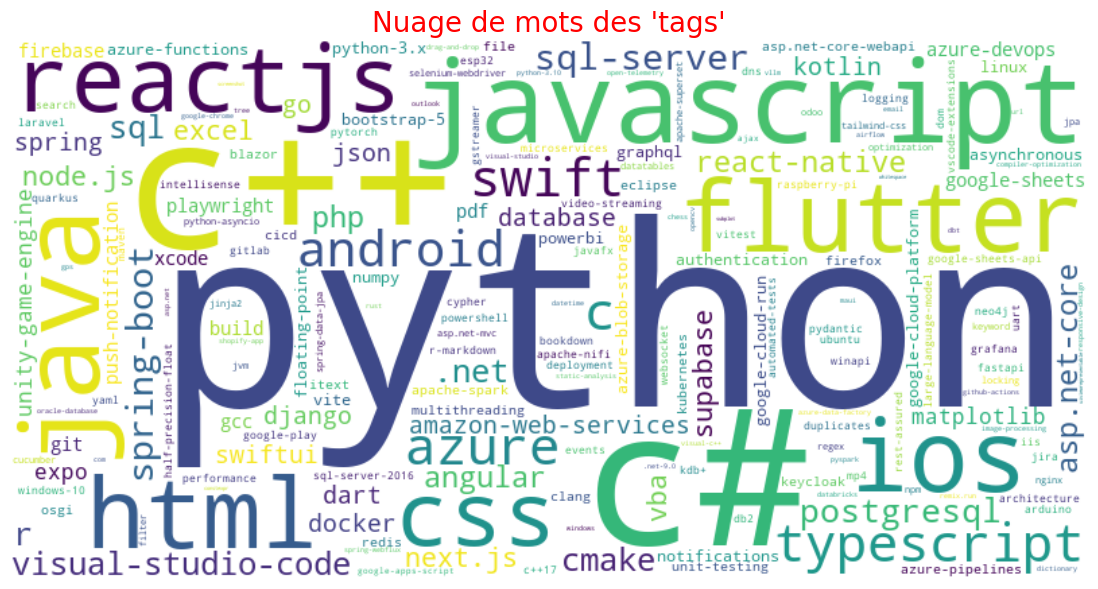

In [19]:
# all_tags = [tag for tags_list in df['tags'] for tag in tags_list]

# supprime les chaînes vides
all_tags = [tag for tags_list in df['tags'] for tag in tags_list if tag]

from collections import Counter
tag_counts = Counter(all_tags)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des 'tags'", fontsize=20, color='red')

In [7]:
tag_counts.most_common()


[('python', 52),
 ('c#', 26),
 ('c++', 25),
 ('javascript', 23),
 ('java', 21),
 ('ios', 18),
 ('html', 17),
 ('flutter', 17),
 ('reactjs', 15),
 ('css', 14),
 ('typescript', 11),
 ('c', 11),
 ('azure', 11),
 ('swift', 11),
 ('android', 10),
 ('sql-server', 10),
 ('spring-boot', 10),
 ('postgresql', 9),
 ('r', 8),
 ('visual-studio-code', 8),
 ('sql', 8),
 ('.net', 8),
 ('cmake', 8),
 ('react-native', 7),
 ('asp.net-core', 7),
 ('php', 7),
 ('angular', 7),
 ('next.js', 6),
 ('excel', 6),
 ('node.js', 6),
 ('supabase', 6),
 ('vba', 6),
 ('swiftui', 5),
 ('docker', 5),
 ('amazon-web-services', 5),
 ('django', 5),
 ('database', 5),
 ('kotlin', 5),
 ('json', 5),
 ('dart', 5),
 ('go', 5),
 ('spring', 5),
 ('unity-game-engine', 4),
 ('matplotlib', 4),
 ('expo', 4),
 ('google-sheets', 4),
 ('azure-devops', 4),
 ('xcode', 4),
 ('push-notification', 4),
 ('git', 4),
 ('playwright', 4),
 ('pdf', 4),
 ('gcc', 4),
 ('build', 4),
 ('firebase', 4),
 ('notifications', 3),
 ('azure-functions', 3),
 ('a

In [8]:
# Définition des catégories de tags
langages = [
    'python', 'r', 'sql', 'julia', 'scala', 'java', 'matlab',
    'c', 'c++', 'c#', 'typescript', 'swift', 'kotlin', 'go', 'ruby', 'php', 'javascript',
    'html', 'css','rust', 'dart', 'objective-c', 'vb.net', 'perl', 'lua', 'clojure'
]
bibliotheques = [
    'pandas', 'numpy', 'scikit-learn', 'xgboost', 'lightgbm', 'keras',
    'pytorch', 'tensorflow', 'nlp', 'reactjs', 'react-native', 'spring-boot',
    'flask', 'django', 'express', 'project-reactor', 'netty', 'huggingface-transformers',
    'sentence-transformers', 'matplotlib', 'ggplot2', 'seaborn', 'shiny'
    ]
edi = [
    'excel', 'sas', 'visual-studio-code', 'vscode', 'pycharm',
    'visual-studio', 'rstudio', 'jupyter', 'colab', 'powerbi', 'smartsheet-api', 'tableau'
]
frameworks = [
    '.net', '.net-4.8', '.net-8.0', '.net-9.0',
    'asp.net', 'asp.net-core', 'asp.net-core-mvc', 'asp.net-mvc',
    'spring', 'spring-boot', 'spring-data-jpa', 'spring-webflux',
    'angular', 'angular-material', 'react-native', 'redux', 'vue.js', 'django',
    'flask', 'fastapi', 'svelte', 'next.js', 'rails', 'symfony'
]

outils = [
    'cmake', 'make', 'gradle', 'maven', 'webpack', 'vite', 'ninja',
    'docker', 'docker-compose', 'jenkins', 'github-actions', 'gitlab',
    'visual-studio', 'vscode', 'pycharm', 'intellij-idea', 'eclipse', 'xcode', 'clion'
]

cloud = [
    'azure', 'azure-devops', 'azure-functions', 'azure-blob-storage',
    'aws-lambda', 'amazon-web-services', 'amazon-s3', 'gcp', 'google-cloud-run',
    'kubernetes', 'kubernetes-helm', 'docker', 'terraform', 'grafana', 'prometheus'
]

plateformes = [
    'android', 'ios', 'android-studio', 'android-camera2', 'android-jetpack-navigation',
    'macos', 'windows', 'linux', 'ubuntu', 'raspberry-pi', 'tvos'
]

sgbd = [
    'sql-server', 'postgresql', 'mysql', 'sqlite', 'oracle-database',
    'db2', 'mongodb', 'firebase-realtime-database', 'influxdb', 'neo4j', 'redis'
]

autres = set(tag_counts.keys()) - set(langages) - set(bibliotheques) - set(edi) - set(cloud) - set(plateformes) - set(sgbd) - set(outils) - set(frameworks)

categories = {
    'Langages': langages,
    'Bibliothèques': bibliotheques,
    'Frameworks': frameworks,
    'Outils': outils,
    'EDI': edi,
    'Cloud': cloud,
    'Plateformes': plateformes,
    'SGBD': sgbd,
    'Autres': list(autres)
}


# Affiche le top 5 des tags pour chaque catégorie
for cat, tags_list in categories.items():
    print(f"\nCatégorie : {cat}")
    filtered = [(tag, tag_counts[tag]) for tag in tags_list if tag in tag_counts]
    filtered.sort(key=lambda x: x[1], reverse=True)
    for tag, count in filtered[:5]:
        print(f"{tag}: {count}")


Catégorie : Langages
python: 52
c#: 26
c++: 25
javascript: 23
java: 21

Catégorie : Bibliothèques
reactjs: 15
spring-boot: 10
react-native: 7
django: 5
matplotlib: 4

Catégorie : Frameworks
spring-boot: 10
.net: 8
asp.net-core: 7
angular: 7
react-native: 7

Catégorie : Outils
cmake: 8
docker: 5
xcode: 4
vite: 3
eclipse: 3

Catégorie : EDI
visual-studio-code: 8
excel: 6
powerbi: 3
visual-studio: 2
smartsheet-api: 1

Catégorie : Cloud
azure: 11
amazon-web-services: 5
docker: 5
azure-devops: 4
azure-functions: 3

Catégorie : Plateformes
ios: 18
android: 10
linux: 3
windows: 2
ubuntu: 2

Catégorie : SGBD
sql-server: 10
postgresql: 9
redis: 3
oracle-database: 2
db2: 2

Catégorie : Autres
flutter: 17
supabase: 6
node.js: 6
vba: 6
database: 5


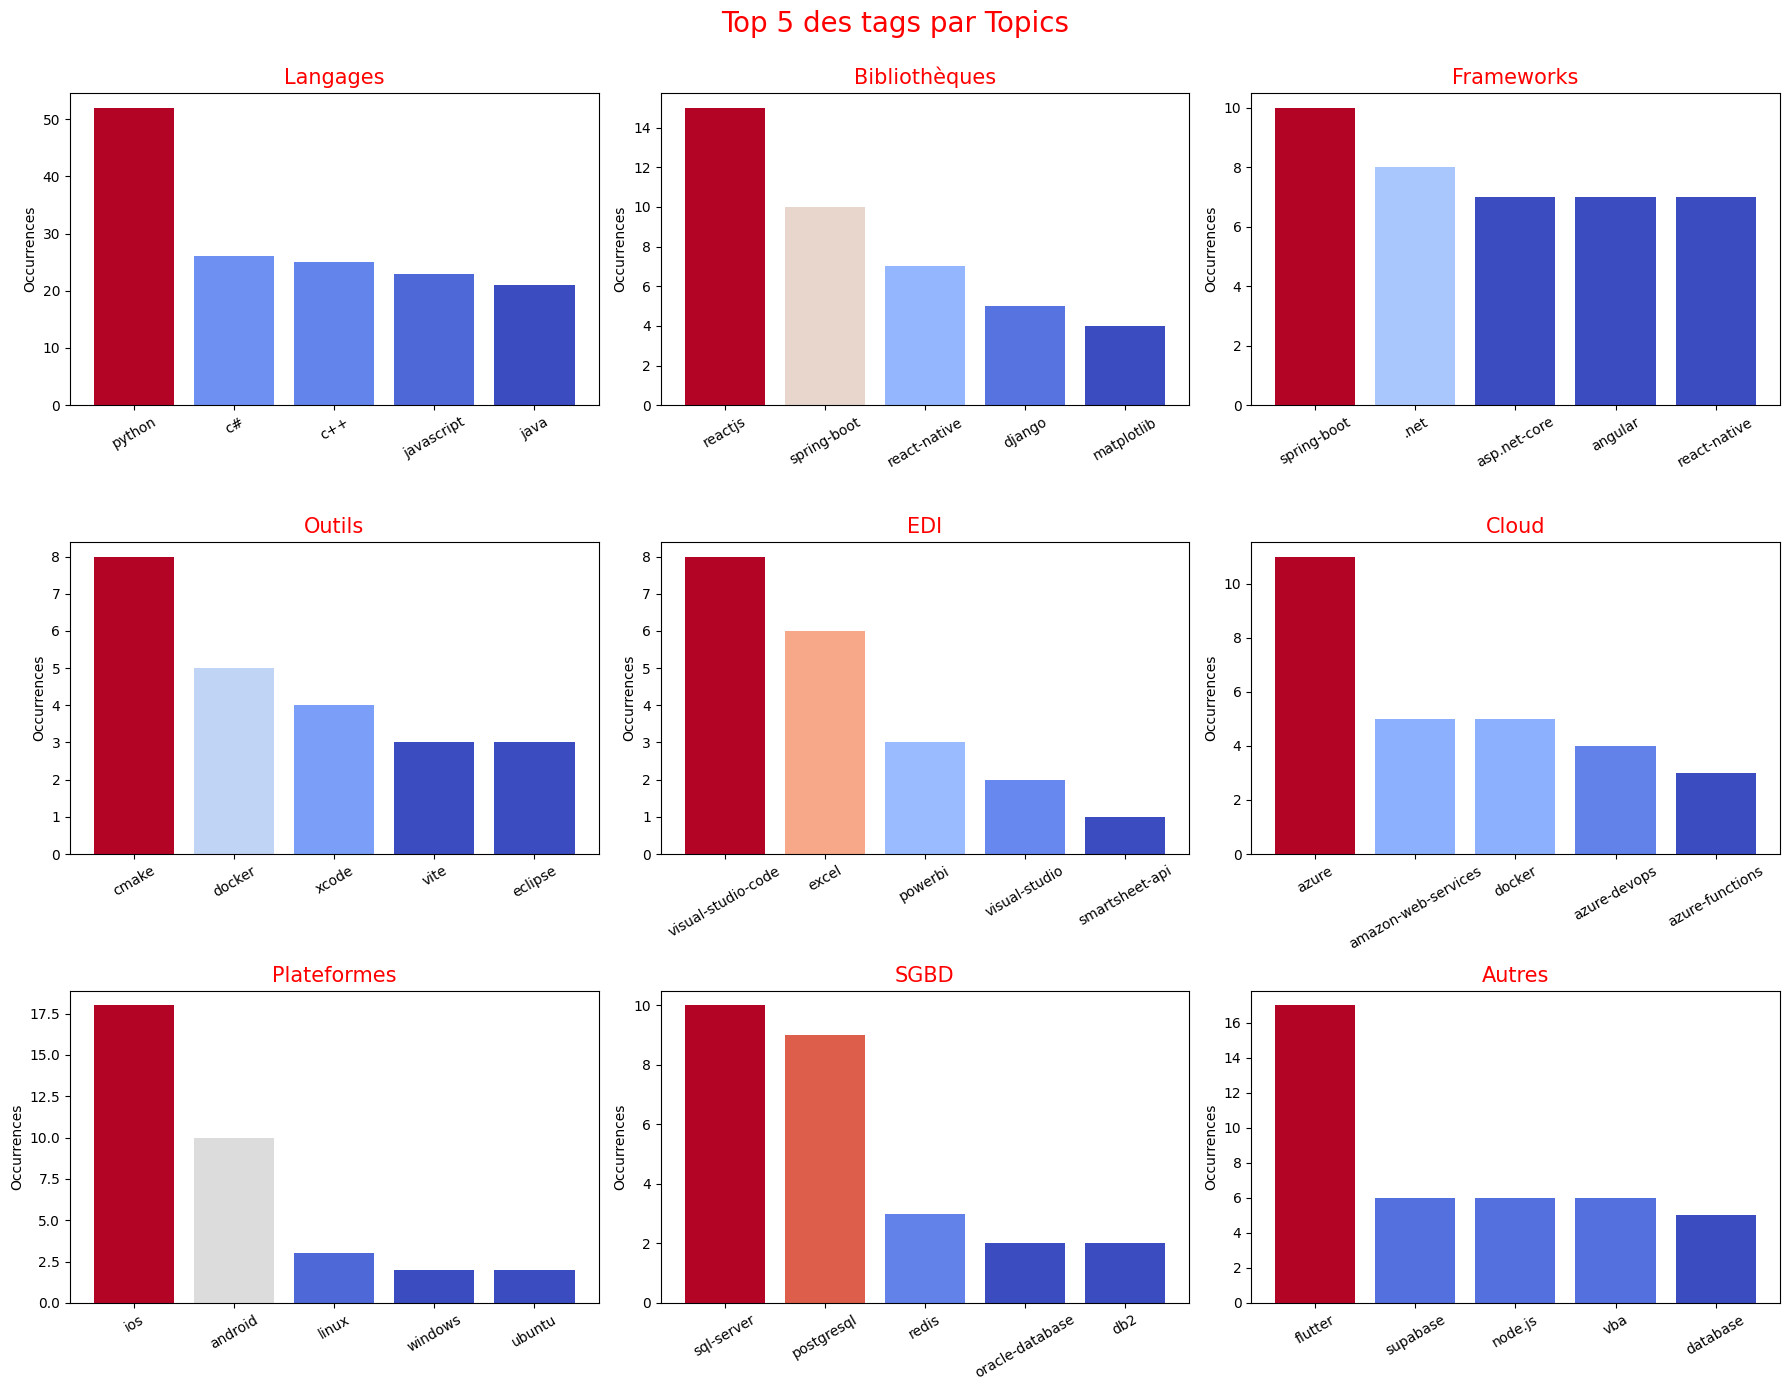

In [24]:
# Visualisation des top tags par catégorie avec dégradé rouge (max) à bleu (min)


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))
axes = axes.flatten()

for idx, (cat, tags_list) in enumerate(categories.items()):
    filtered = [(tag, tag_counts[tag]) for tag in tags_list if tag in tag_counts]
    filtered.sort(key=lambda x: x[1], reverse=True)
    top_tags = filtered[:5]
    if top_tags:
        tags, counts = zip(*top_tags)
        norm = plt.Normalize(min(counts), max(counts))
        colors = cm.coolwarm(norm(counts))  # coolwarm va du bleu au rouge
        axes[idx].bar(tags, counts, color=colors)
        axes[idx].set_title(cat, color='red', fontsize=15)
        axes[idx].set_ylabel('Occurrences')
        axes[idx].tick_params(axis='x', rotation=30)
    else:
        axes[idx].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.suptitle("Top 5 des tags par Topics", fontsize=20, color='red', y=1.02)
plt.show()

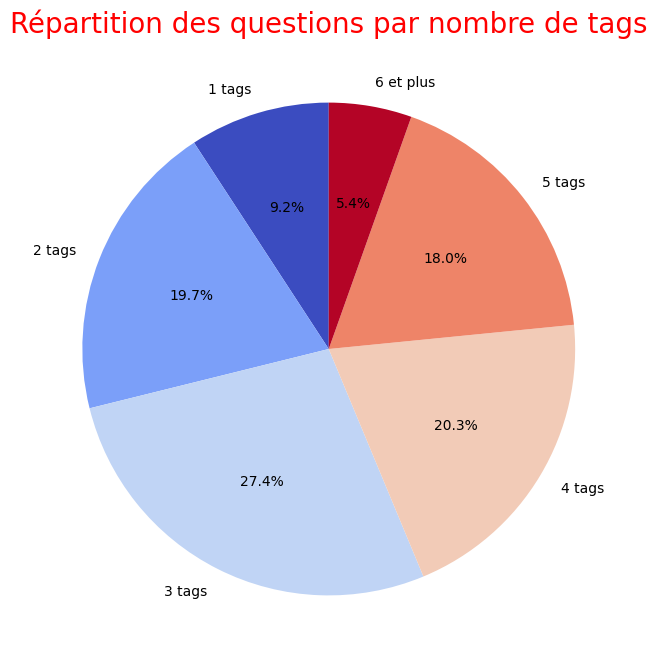

In [20]:
# Pie chart du nombre de tags par question (1,2,3,4,5, '6 et plus')
df['num_tags'] = df['tags'].apply(len)
counts = df['num_tags'].value_counts()
labels = []
values = []
for i in range(1,6):
    labels.append(str(i) + " tags")
    values.append(counts.get(i, 0))
labels.append("6 et plus")
values.append(counts[counts.index >= 6].sum())

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=cm.coolwarm(np.linspace(0,1,len(values))))
plt.title("Répartition des questions par nombre de tags", fontsize=20, color='red')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'python'),
  Text(1, 0, 'c#'),
  Text(2, 0, 'c++'),
  Text(3, 0, 'javascript'),
  Text(4, 0, 'java'),
  Text(5, 0, 'ios'),
  Text(6, 0, 'flutter'),
  Text(7, 0, 'html'),
  Text(8, 0, 'reactjs'),
  Text(9, 0, 'css')])

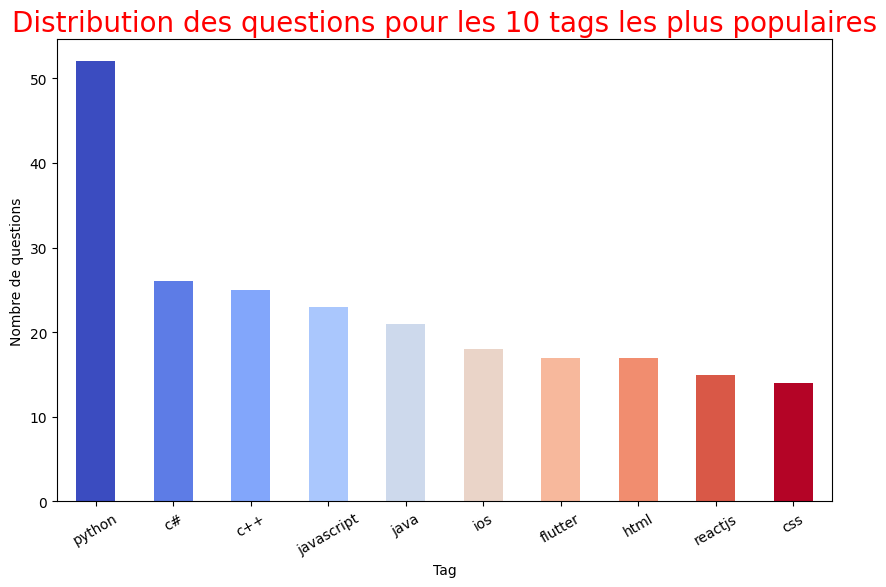

In [21]:
# Extraction des mots-clés les plus fréquents dans les titres
title_words = []
for title in df['title']:
    words = re.findall(r'\b\w+\b', title.lower())
    title_words.extend(words)

stopwords = set(['the', 'a', 'an', 'and', 'or', 'to', 'of', 'in', 'on', 'for', 'with', 'is', 'how', 'can', 'by', 'from', 'at', 'it', 'as', 'be', 'are', 'this', 'that', 'i', 'my', 'but', 'if', 'do', 'does', 'using', 'use', 'when', 'what', 'which', 'not', 'so', 'about', 'after', 'why', 'you', 'we', 'me', 'your', 'was', 'will', 'all', 'any', 'has', 'have', 'had', 'get', 'got', 'would', 'should', 'could', 'just', 'also', 'more', 'some', 'than', 'then', 'there', 'their', 'them', 'its', 'into', 'out', 'up', 'down', 'over', 'under', 'between', 'before', 'been', 'being', 'were', 'did', 'does', 'doing', 'may', 'might', 'must', 'shall', 'such', 'like', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten'])
filtered_words = [w for w in title_words if w not in stopwords and len(w) > 2]
Counter(filtered_words).most_common(20)

# Détection de thèmes ou sujets récurrents dans les résumés
summary_words = []
for summary in df['summary']:
    words = re.findall(r'\b\w+\b', summary.lower())
    summary_words.extend(words)
filtered_summary_words = [w for w in summary_words if w not in stopwords and len(w) > 2]
Counter(filtered_summary_words).most_common(20)

# Visualiser la distribution des questions pour les tags les plus populaires
import matplotlib.pyplot as plt
popular_tags = pd.Series(all_tags).value_counts().head(10)
plt.figure(figsize=(10,6))
popular_tags.plot(kind='bar', color=cm.coolwarm(np.linspace(0,1,10)))
plt.xlabel('Tag')
plt.ylabel('Nombre de questions')
plt.title('Distribution des questions pour les 10 tags les plus populaires', fontsize=20, color='red')
plt.xticks(rotation=30)

Text(0.5, 1.0, 'Heatmap des associations entre les 10 tags les plus populaires')

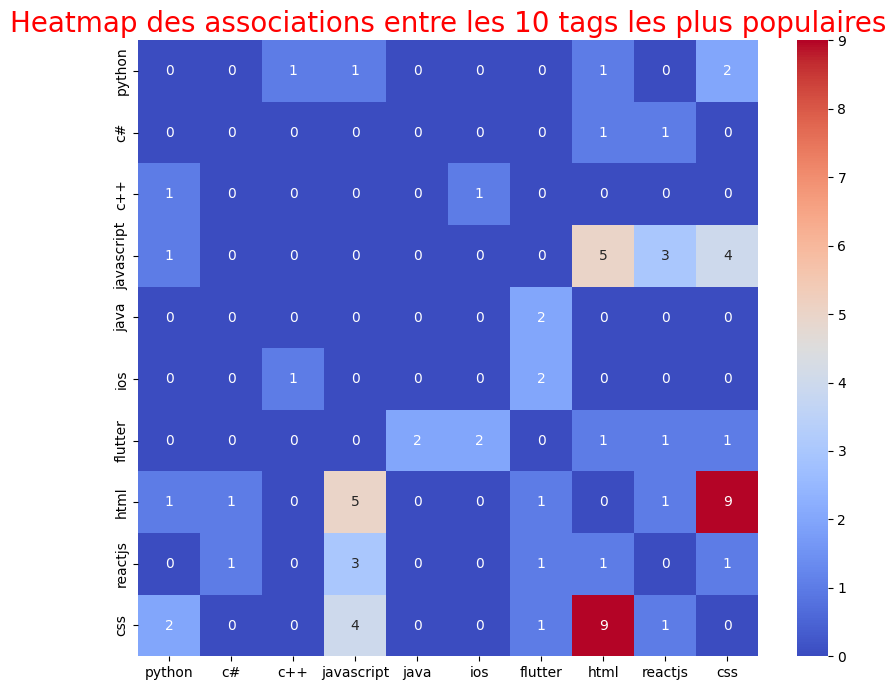

In [22]:
# Heatmap des associations de tags
# Créer une matrice de co-occurrence des tags
tag_list = list(popular_tags.index)
co_matrix = pd.DataFrame(0, index=tag_list, columns=tag_list)
for tags in df['tags']:
    present = [tag for tag in tags if tag in tag_list]
    for t1, t2 in combinations(present, 2):
        co_matrix.loc[t1, t2] += 1
        co_matrix.loc[t2, t1] += 1

plt.figure(figsize=(10,8))
sns.heatmap(co_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap des associations entre les 10 tags les plus populaires', fontsize=20, color='red')
